# Step 1: Fetch Market Data
Install yfinance library and fetch historical stock data using yfinance. Save the data to the data/raw/ directory.

In [81]:
# Install yfinance library
%pip install yfinance 

#Fetch data from Yahoo Finance
import yfinance as yf # Import yfinance
import pandas as pd # Import pandas

# Fetch data for a specific stock (e.g. AAPL)
ticker = 'AAPL' # Stock ticker
start_date = '2020-01-01' # Start date
end_date = '2023-01-01' # End date

data = yf.download(ticker, start=start_date, end=end_date)
data = data[['Close']] # Keep only the Close price
data.reset_index(inplace=True) # Reset the index
print(data.head()) # Print the first few rows of the data

import os 

# Create a directory to store the data with subfolder for the ticker and date
directory = f'data/raw/{ticker}_{start_date}_to_{end_date}'
os.makedirs(directory, exist_ok=True)

# Save the data to a CSV file in the subfolder
data.to_csv(f'{directory}/{ticker}_stock_data.csv', index=False)


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


[*********************100%***********************]  1 of 1 completed

Price        Date      Close
Ticker                  AAPL
0      2020-01-02  75.087502
1      2020-01-03  74.357498
2      2020-01-06  74.949997
3      2020-01-07  74.597504
4      2020-01-08  75.797501



### Dependencies
- yfinance: Library for downloading financial market data
- pandas: Data manipulation library
- os: Operating system interface for directory management

First, we install the yfinance library and import it, as well as import pandas, the standard library for data manipulation and analysis in Python.
After that, we need to introduce a few variables **ticker** is the variable that defines the stock symbol to analyze
**start_date** and **end_date** define the time period for data collection

After we have those variables, we create another one called **data**.
Here, we store the information we download from yf (Yahoo Finance). To download the right information, we input the 3 variables we have set up before. It is important to store the ticker and the dates in variables to avoid having to change their information in multiple places in the code.
From this downloaded data, we only want to keep the closing price. Also, we want to convert the date index to a regular column, and print the first few rows of data for verification purposes. 

After that, we create a variable called **directory** where we will store the dataset. We use an f string to customize this directory to the ticker and time periods we're using. 
Finally, we turn our data into a csv file and save it to our directory. 

# Step 2: Exploratory Data Analysis (EDA)
Load the dataset, visualize the closing price, check for missing values, and identify trends and seasonality.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 757 entries, 0 to 756
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    756 non-null    object
 1   Close   757 non-null    object
dtypes: object(2)
memory usage: 12.0+ KB
None


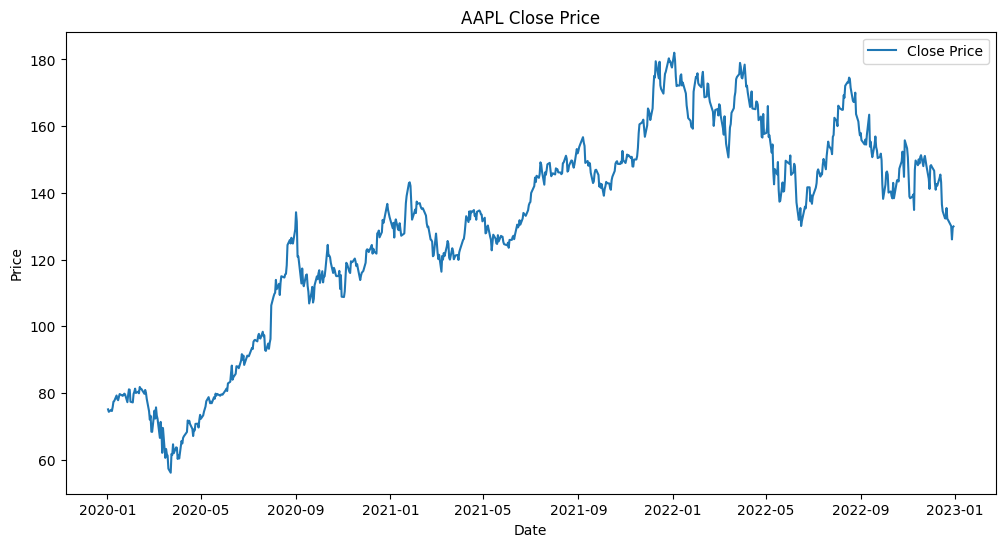

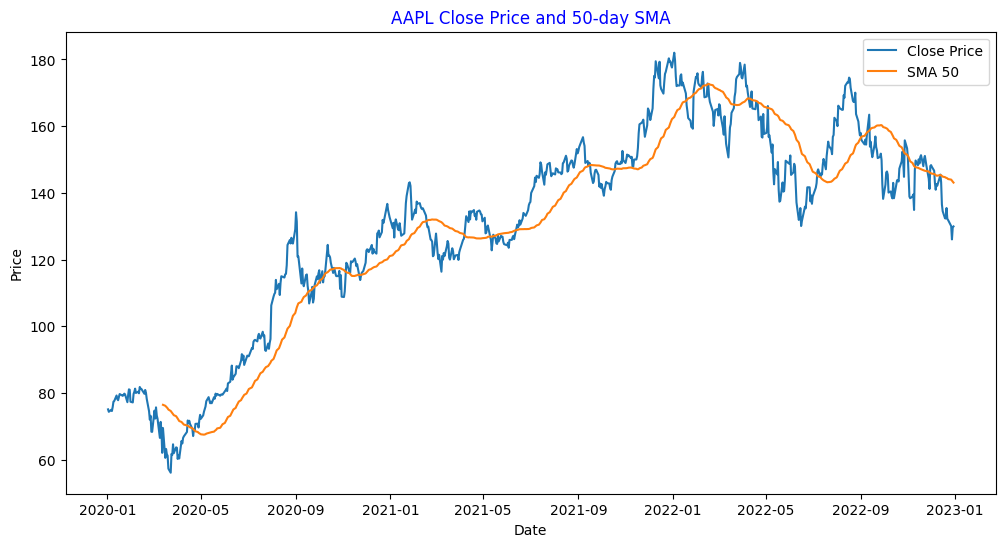

In [82]:

import matplotlib.pyplot as plt

# Directory where data is stored for loading the dataset
directory = f'data/raw/{ticker}_{start_date}_to_{end_date}'

# Load the dataset
data = pd.read_csv(f'{directory}/{ticker}_stock_data.csv')
print(data.info()) # Print the information about the dataset

# Convert 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Ensure 'Close' column is numeric
data['Close'] = pd.to_numeric(data['Close'], errors='coerce') # Coerce to NaN if error

# Visualize the closing price

plt.figure(figsize=(12, 6)) # Set the figure size
plt.plot(data['Date'], data['Close'], label='Close Price') # Plot the close price
plt.title(f'{ticker} Close Price') # Set the title
plt.xlabel('Date') # Set the x-axis label
plt.ylabel('Price') # Set the y-axis label
plt.legend() # Show the legend
plt.show() # Show the plot

# Check for and count missing values
missing_values = data.isnull().sum()  

# Identify trends and seasonality: Add simple moving averages or rolling means to observe trends
data['SMA_50'] = data['Close'].rolling(window=50).mean() # 50-day moving average
plt.figure(figsize=(12, 6)) # Set the figure size
plt.plot(data['Date'], data['Close'], label='Close Price') # Plot the close price
plt.plot(data['Date'], data['SMA_50'], label='SMA 50') # Plot the 50-day moving average
plt.title(f'{ticker} Close Price and 50-day SMA', color='blue') # Set the title
plt.xlabel('Date') # Set the x-axis label
plt.ylabel('Price') # Set the y-axis label
plt.legend() # Show the legend
plt.show() # Show the plot

Here, we use pd.read_csv to read the csv file and store this in a **data** variable, and we print some information about the dataset.

After that, we convert the date strings from our data to datetime objects, which enables proper date-based operations and plotting. We ensure that our data is numeric and errors='coerce' converts invalid values to NaN instead of raising errors.

Next, we create our visualization, setting figure size, choosing the x and y data pieces (Price and Date in this case), give the graph a title, show the legend, and deploy the graph.

Before moving to trend analysis, The line missing_values = data.isnull().sum() performs a series of operations to detect and count missing values in the DataFrame:

1. First, data.isnull() creates a boolean DataFrame of the same shape as the original data where:
    - True represents missing values (like None, numpy.NaN, pandas.NaT)
    - False represents non-missing values
    - Note that empty strings ('') and infinity values are not considered missing by default

2. Then, .sum() counts the number of True values in each column:
    - By default, it sums along axis 0 (vertically down the columns)
    - skipna=True by default, meaning it will skip NA values in the counting process
    - Returns a pandas Series with the count of missing values for each column

This is a critical data quality check that should be performed early in data analysis because:
- Missing values can affect statistical calculations
- Many machine learning algorithms cannot handle missing values
- It helps determine if data cleaning is needed

Following that, we move on to trend analysis.
First, the code calculates a 50-day Simple Moving Average:
- data['SMA_50'] = data['Close'].rolling(window=50).mean() creates a new column 'SMA_50'
- The rolling() function creates a 50-day window that slides over the data
- mean() calculates the average of values within each window

Then, it creates a visualization using matplotlib:
1. plt.figure(figsize=(12, 6)) creates a new figure with dimensions 12x6 inches
2. Two lines are plotted:
- The actual closing prices using plt.plot(data['Date'], data['Close'])
- The 50-day SMA using plt.plot(data['Date'], data['SMA_50'])
3. The plot is decorated with:
- A blue title showing the ticker symbol
- Axis labels for Date and Price
- A legend showing both line descriptions
4. Finally, plt.show() displays the plot

#### Key gotchas to watch for:
- The first 49 days of SMA values will be NaN since there isn't enough data for a 50-day average
- The ticker variable must be defined before running this code
- Make sure the 'Date' column is properly formatted as datetime objects

# Step 3: Preprocess Data
Convert dates into a numerical format, split the data into input features and target labels, perform train-test split, and normalize the data.

In [83]:
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Convert dates into a numerical format
data['Date'] = pd.to_datetime(data['Date'])
data['Date'] = data['Date'].map(datetime.toordinal)

# Split the data into input features (X) and target labels (y)
X = data['Date'].values.reshape(-1, 1)  # Reshape for sklearn compatibility
y = data['Close'].values

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80-20 split

# Normalize the data (optional)
scaler = MinMaxScaler()
y_train = scaler.fit_transform(y_train.reshape(-1, 1))
y_test = scaler.transform(y_test.reshape(-1, 1))

### Data Preprocessing for Time Series Analysis
This code segment demonstrates essential preprocessing steps for preparing time series data for machine learning, specifically for stock price prediction. Let's break down the key components:

Before anything else, we need to import a few things. datetime provides tools for working with dates and times, train_test_split randomly splits datasets into training and testing sets, and is essential for creating separate data subsets to evaluate model performance. Finally MinMaxScaler is a preprocessing tool that scales numerical features to a fixed range (typically [0,1]) and
helps normalize data for machine learning models.

#### Date Processing
The code first converts the date column into a numerical format that machine learning models can process:
- Converts string dates to datetime objects using pd.to_datetime()
- Maps these datetime objects to ordinal numbers (days since January 1, 1) using datetime.toordinal()

#### Feature and Target Preparation
The data is split into features (X) and target values (y):
- X: Dates reshaped to a 2D array (-1, 1) for scikit-learn compatibility
- y: Closing prices extracted as a 1D array

#### Train-Test Split
Using scikit-learn's train_test_split:
- Splits data into 80% training and 20% testing sets
- random_state=42 ensures reproducible results
- Returns X_train, X_test, y_train, y_test

#### Data Normalization
The closing prices are normalized using MinMaxScaler:
- Scales values to range [0,1] by default
- fit_transform() on training data learns scaling parameters and applies them
- transform() applies same scaling to test data to prevent data leakage

#### Key Gotchas
- Date ordinal conversion loses time information (only dates remain)
- reshape(-1, 1) is crucial for scikit-learn compatibility
- Always scale test data using parameters from training data
- MinMaxScaler is sensitive to outliers

# Step 4: Build Simple Models
Train a Linear Regression model, evaluate the model, and visualize predictions.

Training MSE: 0.0170


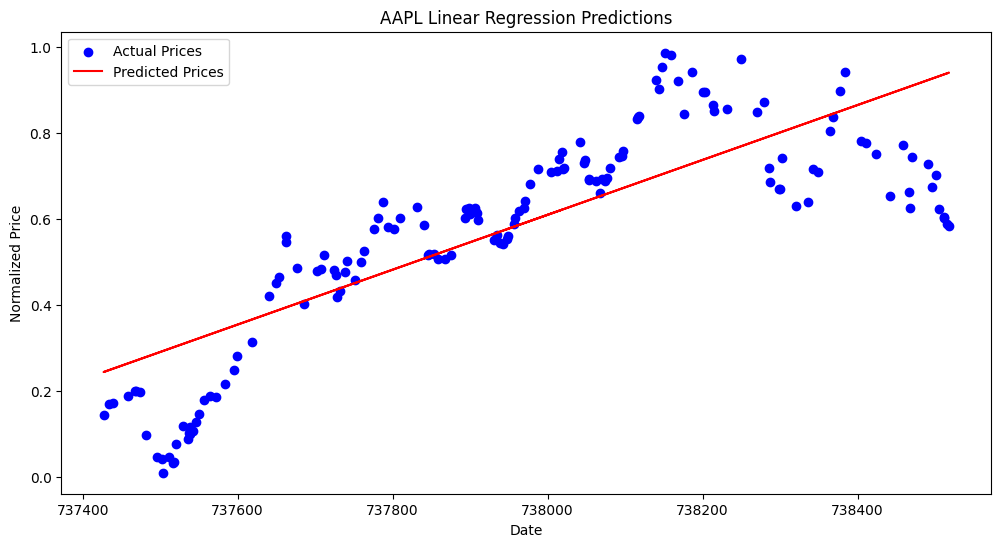

In [84]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Remove NaN values from y_train and y_test
non_nan_indices_train = ~np.isnan(y_train).flatten()
non_nan_indices_test = ~np.isnan(y_test).flatten()

X_train_non_nan = X_train[non_nan_indices_train]
y_train_non_nan = y_train[non_nan_indices_train]

X_test_non_nan = X_test[non_nan_indices_test]
y_test_non_nan = y_test[non_nan_indices_test]

# Train a linear regression model
lr = LinearRegression() # Create the model
lr.fit(X_train_non_nan, y_train_non_nan) # Train the model

# Predict on the training and test data
y_pred_train = lr.predict(X_train_non_nan) # Predict on the training data
y_pred_test = lr.predict(X_test_non_nan) # Predict on the test data

# Evaluate the model
mse_train = mean_squared_error(y_train_non_nan, y_pred_train) # Calculate the MSE on the training data
mse_test = mean_squared_error(y_test_non_nan, y_pred_test) # Calculate the MSE on the test data
print(f'Training MSE: {mse_train:.4f}') # Print the training MSE

# Visualize the predictions
plt.figure(figsize=(12, 6)) # Set the figure size
plt.scatter(X_test_non_nan, y_test_non_nan, color='blue', label='Actual Prices') # Plot the training data
plt.plot(X_test_non_nan, y_pred_test, color='red', label='Predicted Prices') # Plot the predictions
plt.title(f'{ticker} Linear Regression Predictions') # Set the title
plt.xlabel('Date') # Set the x-axis label
plt.ylabel('Normalized Price') # Set the y-axis label
plt.legend() # Show the legend
plt.show() # Show the plot

#### Data Preparation
First, the code handles missing values in the training and test datasets:
- np.isnan(y_train).flatten() creates a boolean array indicating where y_train has NaN values.
- ~ negates the boolean array, so non_nan_indices_train is True where y_train is not NaN.
- X_train_non_nan and y_train_non_nan are created by selecting only the non-NaN indices from X_train and y_train.
- The same process is repeated for X_test and y_test.

#### Training the Model
- A LinearRegression model is instantiated.
- The fit method is called with X_train_non_nan and y_train_non_nan to train the model.

#### Making Predictions
- The predict method is used to make predictions on the training and test data.

#### Evaluating the Model
- mean_squared_error calculates the mean squared error between the actual and predicted values for both training and test data.
- The training MSE is printed.

#### Visualizing the Predictions
- A figure is created with a specified size.
- plt.scatter plots the actual test data points.
- plt.plot plots the predicted values.
- The plot is titled with the ticker variable.
- X and Y axis labels are set.
- A legend is added to differentiate between actual and predicted values.
- The plot is displayed.

#### Common Gotchas
datetime is the module, while datetime.datetime is the actual class
train_test_split maintains the proportion of samples for each class in classification tasks
MinMaxScaler should be fit only on training data to prevent data leakage

# Step 5: Introduce Complexity - Polynomial Regression
Generate polynomial features, train a polynomial regression model, evaluate the model, and visualize overfitting.

Polynomial Training MSE: 0.0070
Polynomial Test MSE: 0.0080


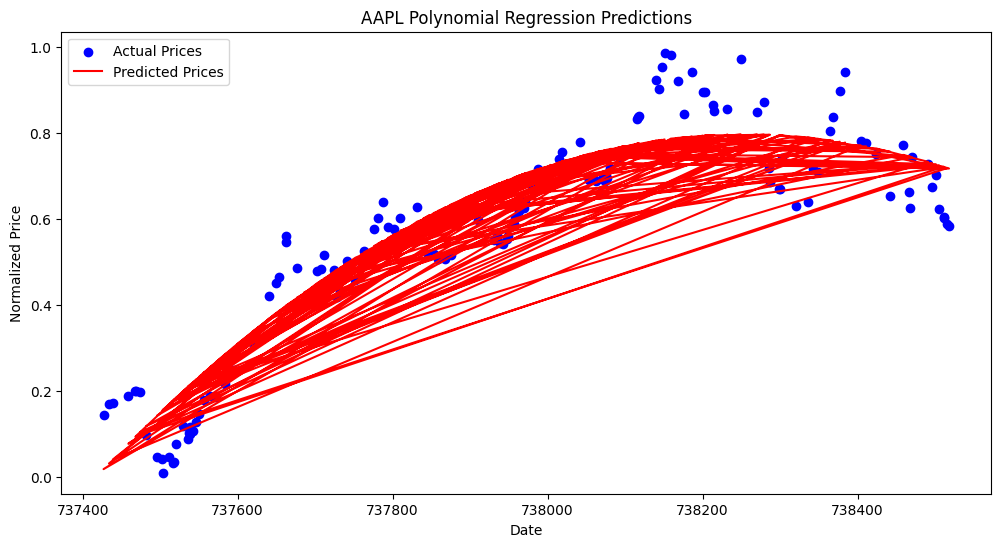

In [85]:
from sklearn.preprocessing import PolynomialFeatures

# Create polynomial features
poly = PolynomialFeatures(degree=5) # Start with a 5th degree polynomial
X_train_poly = poly.fit_transform(X_train_non_nan) # Transform the training data
X_test_poly = poly.transform(X_test_non_nan) # Transform the test data

# Train a polynomial regression model
poly_lr = LinearRegression() # Create the model
poly_lr.fit(X_train_poly, y_train_non_nan) # Train the model

# Make predictions
y_pred_train_poly = poly_lr.predict(X_train_poly) # Predict on the training data
y_pred_test_poly = poly_lr.predict(X_test_poly) # Predict on the test data

# Evaluate the model
mse_train_poly = mean_squared_error(y_train_non_nan, y_pred_train_poly) # Calculate the MSE on the training data
mse_test_poly = mean_squared_error(y_test_non_nan, y_pred_test_poly) # Calculate the MSE on the test data
print(f'Polynomial Training MSE: {mse_train_poly:.4f}') # Print the training MSE
print(f'Polynomial Test MSE: {mse_test_poly:.4f}') # Print the test MSE

# Visualize the predictions
plt.figure(figsize=(12, 6)) # Set the figure size
plt.scatter(X_test_non_nan, y_test_non_nan, color='blue', label='Actual Prices') # Plot the training data
plt.plot(X_test_non_nan, y_pred_test_poly, color='red', label='Predicted Prices') # Plot the predictions
plt.title(f'{ticker} Polynomial Regression Predictions') # Set the title
plt.xlabel('Date') # Set the x-axis label
plt.ylabel('Normalized Price') # Set the y-axis label
plt.legend() # Show the legend
plt.show() # Show the plot


This code implements polynomial regression to predict stock prices, extending the complexity of the model beyond simple linear regression. Let's break it down:

#### Feature Generation
First we create polynomial features up to degree 5  and transform date values into polynomial terms (x, x², x³, x⁴, x⁵).
The notebook lears the transformation from training data and applies the same transformation to test data.

#### Model Training and Prediction
We use LinearRegression on the polynomial features and make predictions on both training and test sets

#### Model Evaluation
Later, we calculate the Mean Squared Error for both datasets and print the results with 4 decimal places.

#### Visualization
Finally, we creates a scatter plot of actual prices and we overlay line plot of predicted prices.

#### Key Gotchas
- Higher polynomial degrees can lead to overfitting
- Date values should be normalized before polynomial transformation


# Step 6: Mitigate Overfitting - Regularization
Train a Ridge Regression model and compare its performance to the overfit polynomial model.

Ridge Training MSE: 0.0170
Ridge Test MSE: 0.0208


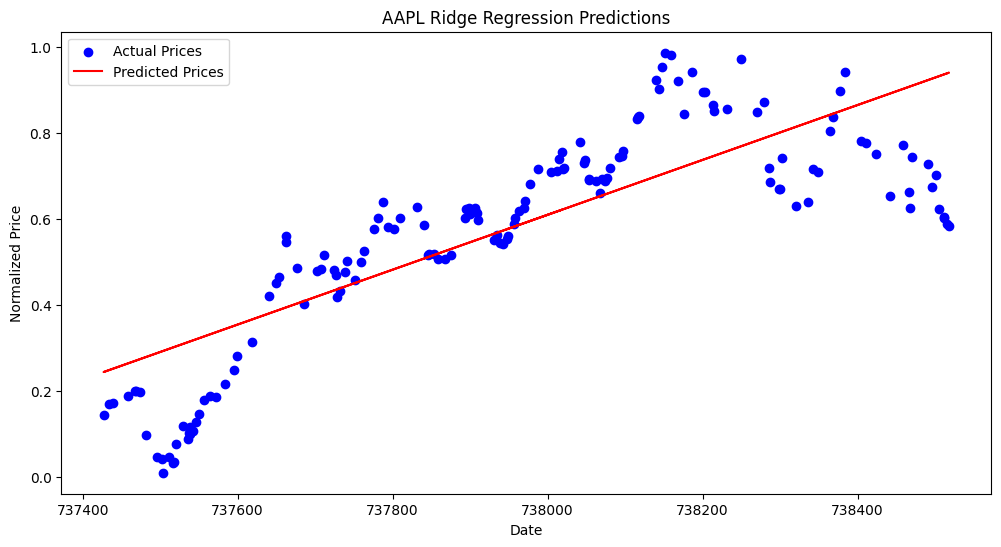

In [86]:
from sklearn.linear_model import Ridge

# Train a Ridge regression model
ridge = Ridge(alpha=0.1) # Create the model
ridge.fit(X_train_non_nan, y_train_non_nan) # Train the model

# Predict on the training and test data
y_pred_train_ridge = ridge.predict(X_train_non_nan) # Predict on the training data
y_pred_test_ridge = ridge.predict(X_test_non_nan) # Predict on the test data

# Evaluate the model
mse_train_ridge = mean_squared_error(y_train_non_nan, y_pred_train_ridge) # Calculate the MSE on the training data
mse_test_ridge = mean_squared_error(y_test_non_nan, y_pred_test_ridge) # Calculate the MSE on the test data
print(f'Ridge Training MSE: {mse_train_ridge:.4f}') # Print the training MSE
print(f'Ridge Test MSE: {mse_test_ridge:.4f}') # Print the test MSE

# Visualize the predictions
plt.figure(figsize=(12, 6)) # Set the figure size
plt.scatter(X_test_non_nan, y_test_non_nan, color='blue', label='Actual Prices') # Plot the training data
plt.plot(X_test_non_nan, y_pred_test_ridge, color='red', label='Predicted Prices') # Plot the predictions
plt.title(f'{ticker} Ridge Regression Predictions') # Set the title
plt.xlabel('Date') # Set the x-axis label
plt.ylabel('Normalized Price') # Set the y-axis label
plt.legend() # Show the legend
plt.show() # Show the plot

This code implements Ridge Regression, a regularized version of linear regression, for predicting stock prices. Let's break down the key components:

#### Model Setup and Training
Here, we create a Ridge regression model with regularization strength alpha=0.1. Lower alpha values mean less regularization (closer to standard linear regression). Finally, we fit the model using the cleaned training data.

#### Prediction
After training the model, we need to make predictions on both training and test datasets, and return normalized price predictions, which come due to the earlier scaling we did.

#### Model Evaluation
The next thing we need to do is calculate the Mean Squared Error for both training and test sets.

#### Visualization
Lastly, we create a 12x6 inch plot, where the blue scatter points show actual prices and the red line shows model predictions.

#### Key Gotchas
- alpha parameter needs tuning - too high causes underfitting, too low causes overfitting
- Data should be normalized before training (handled earlier in the code)
- Model assumes linear relationship with regularization
- Missing values must be handled before training

# Step 7: Stress-Test Models
Add noise to test data and evaluate model performance on noisy data.

Ridge Noisy Test MSE: 0.0301


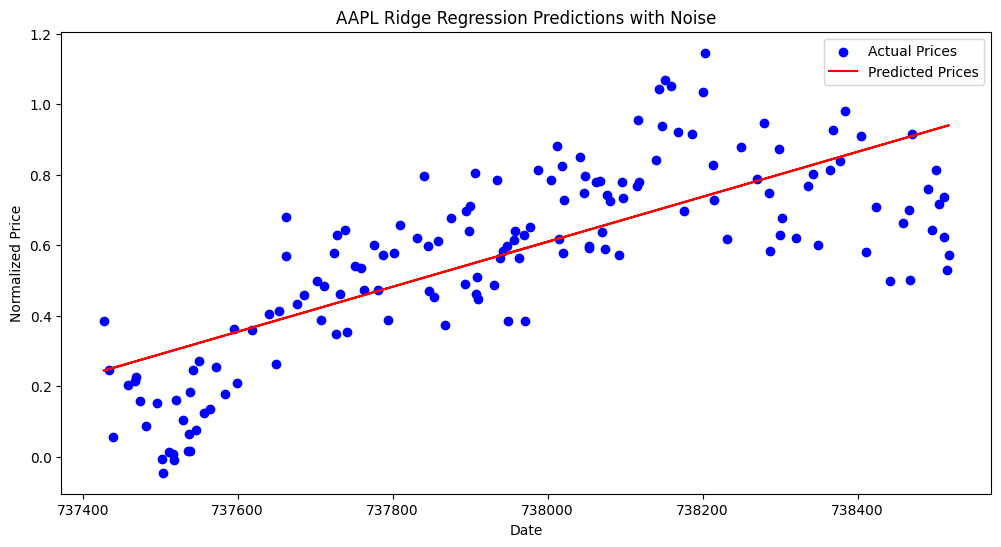

In [87]:
# Add noise to test data
import numpy as np

noise = np.random.normal(0, 0.1, y_test_non_nan.shape) # Generate noise
y_test_noisy = y_test_non_nan + noise # Add noise to the test data

# Evaluate the model with noisy test data
y_pred_test_ridge = ridge.predict(X_test_non_nan) # Predict on the noisy test data
mse_test_noisy = mean_squared_error(y_test_noisy, y_pred_test_ridge) # Calculate the MSE on the noisy test data
print(f'Ridge Noisy Test MSE: {mse_test_noisy:.4f}') # Print the noisy test MSE

# Visualize the predictions
plt.figure(figsize=(12, 6)) # Set the figure size
plt.scatter(X_test_non_nan, y_test_noisy, color='blue', label='Actual Prices') # Plot the training data
plt.plot(X_test_non_nan, y_pred_test_ridge, color='red', label='Predicted Prices') # Plot the predictions
plt.title(f'{ticker} Ridge Regression Predictions with Noise') # Set the title
plt.xlabel('Date') # Set the x-axis label
plt.ylabel('Normalized Price') # Set the y-axis label
plt.legend() # Show the legend
plt.show() # Show the plot

This code demonstrates how to test a Ridge Regression model's robustness by adding random noise to the test data. Let's break down the key components:

#### Noise Generation and Addition
First, we create Gaussian noise a with mean of 0 and a standard deviation of 0.1, and then add this noise to the test data to simulate real-world data variations. The shape matches the test data exactly

#### Model Evaluation
After adding noise to the test data, we makespredictions using the original features, compare the predictions against noisy targets, and print out the Mean Squared Error with 4 decimal places.

#### Visualization
Lastly, as always, we visualize. In this case, we create a scatter plot of noisy data points and overlay model predictions as a continuous line, using different colors to distinguish actual vs predicted values.

# Step 8: Visualize and Interpret Results
Plot learning curves, summarize findings through graphs and metrics, and save plots to results/plots/.

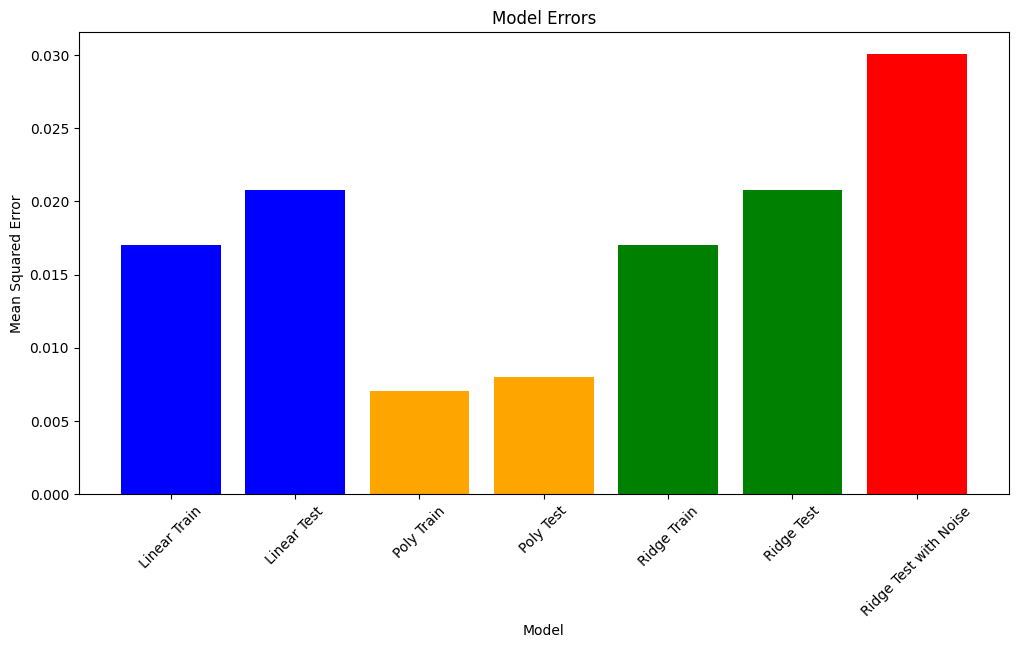

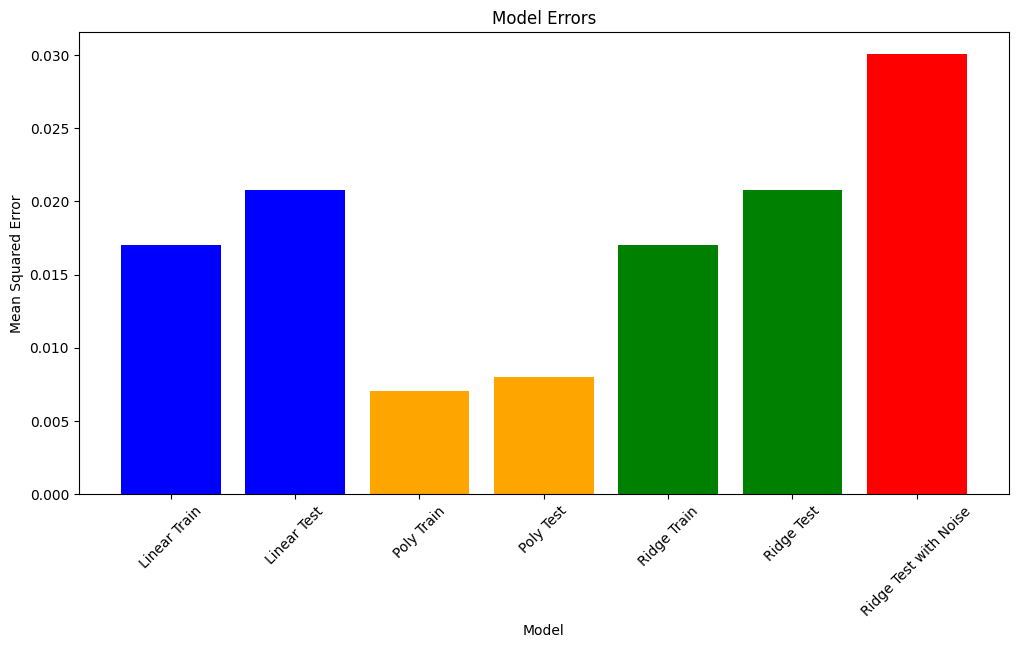

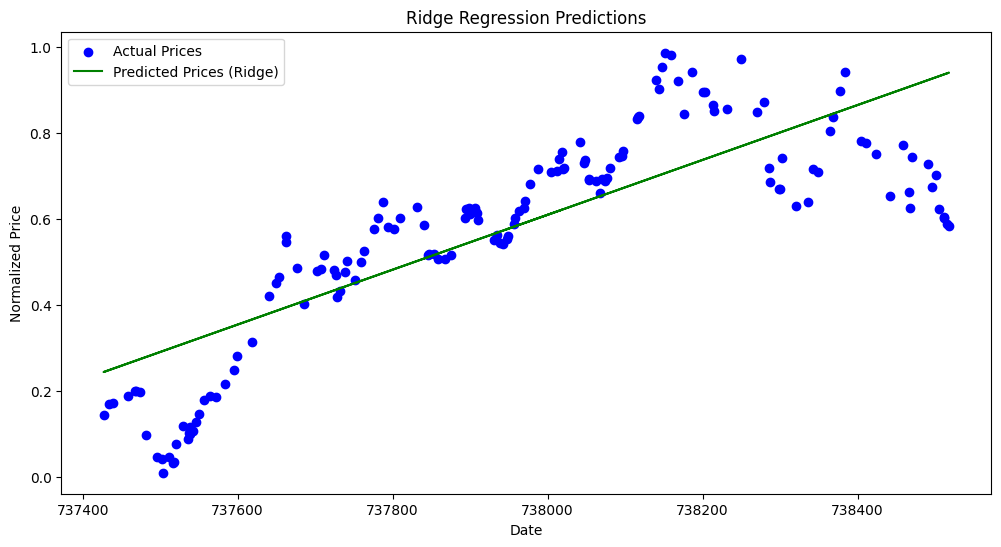

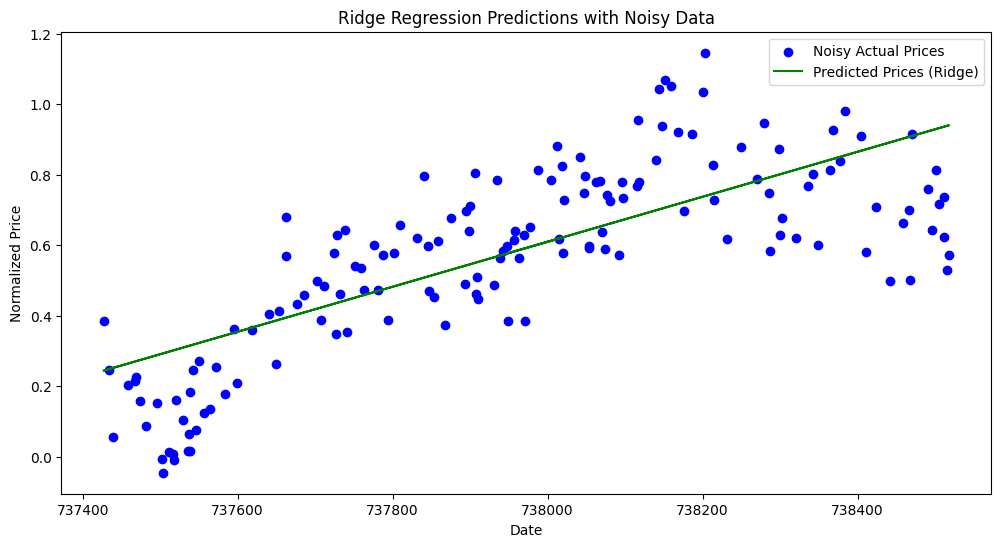

In [88]:
# Plot learning curves: Show training vs. testing error for different models
errors = [mse_train, mse_test, mse_train_poly, mse_test_poly, mse_train_ridge, mse_test_ridge, mse_test_noisy]
labels = ['Linear Train', 'Linear Test', 'Poly Train', 'Poly Test', 'Ridge Train', 'Ridge Test', 'Ridge Test with Noise']

plt.figure(figsize=(12, 6))
plt.bar(labels, errors, color=['blue', 'blue', 'orange', 'orange', 'green', 'green', 'red'])
plt.title('Model Errors')
plt.xlabel('Model')
plt.ylabel('Mean Squared Error')
plt.xticks(rotation=45)
plt.show()

# Save plots to results/plots/ directory
import os

# Create directory if it doesn't exist
os.makedirs('results/plots/', exist_ok=True)

# Save the bar plot
plt.figure(figsize=(12, 6))
plt.bar(labels, errors, color=['blue', 'blue', 'orange', 'orange', 'green', 'green', 'red'])
plt.title('Model Errors')
plt.xlabel('Model')
plt.ylabel('Mean Squared Error')
plt.xticks(rotation=45)
plt.savefig('results/plots/model_errors.png')

# Save the Ridge Regression predictions plot
plt.figure(figsize=(12, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Prices')
plt.plot(X_test, y_pred_test_ridge, color='green', label='Predicted Prices (Ridge)')
plt.title('Ridge Regression Predictions')
plt.xlabel('Date')
plt.ylabel('Normalized Price')
plt.legend()
plt.savefig('results/plots/ridge_regression_predictions.png')

# Save the Ridge Regression predictions with noisy data plot
plt.figure(figsize=(12, 6))
plt.scatter(X_test, y_test_noisy, color='blue', label='Noisy Actual Prices')
plt.plot(X_test, y_pred_test_ridge, color='green', label='Predicted Prices (Ridge)')
plt.title('Ridge Regression Predictions with Noisy Data')
plt.xlabel('Date')
plt.ylabel('Normalized Price')
plt.legend()
plt.savefig('results/plots/ridge_regression_predictions_noisy.png')

This code creates and saves several visualization plots to compare different regression models' performance. Let's break down the key components:

#### Error Comparison Bar Plot
First, we create a bar plot comparing Mean Squared Error (MSE) across different models and scenarios, using:

- Color coding to distinguish model types (blue, orange, green, red)
- 45-degree rotated labels for better readability
- Consistent 12x6 inch figure size

#### Directory Setup and Plot Saving
After that, we create a directory structure for saving plots, using exist_ok=True to prevent errors if the directory exists, and saving three different plots in PNG format.

#### Ridge Regression Visualization
Next, we create two scatter plots with prediction lines:
1. Standard predictions vs actual values
2. Predictions vs noisy data

#### Key Gotchas
- Make sure mse_* variables are defined before plotting
- plt.figure() creates new figure each time - prevents plot overlap
- File paths are relative to notebook location
- Previous plots should be cleared or closed to manage memory